Import the required libraries and load the training and testing dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df_train=pd.read_csv('train.csv')
df_train.shape
for column in list(df_train.columns):
    df_train.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       10886 non-null  object 
 1   season         10886 non-null  object 
 2   holiday        10886 non-null  int64  
 3   workingday     10886 non-null  int64  
 4   weather        10886 non-null  object 
 5   temp           10886 non-null  float64
 6   atemp          10886 non-null  float64
 7   humidity       10886 non-null  int64  
 8   windspeed      10886 non-null  float64
 9   total_booking  10886 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 850.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       10886 non-null  object 
 1   season         10886 non-null  object 
 2   holiday  

Analyze the dataset & Perform Feature Engineering

In [3]:
print (df_train.isnull().sum())
print (df_train.shape)

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
dtype: int64
(10886, 10)


In [4]:
df_train['date'] = pd.to_datetime(df_train['datetime']).dt.date
df_train['time'] = pd.to_datetime(df_train['datetime']).dt.time
df_train['hour'] = pd.to_datetime(df_train['datetime']).dt.hour
df_train['month'] = pd.to_datetime(df_train['datetime']).dt.month
df_train['weekday'] = pd.to_datetime(df_train['datetime']).dt.weekday

In [5]:
df_train=df_train.astype({"season":'category', "holiday":'category', "workingday":'category', "weather":'category'})
for column in list(df_train.columns):
    df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   datetime       10886 non-null  object  
 1   season         10886 non-null  category
 2   holiday        10886 non-null  category
 3   workingday     10886 non-null  category
 4   weather        10886 non-null  category
 5   temp           10886 non-null  float64 
 6   atemp          10886 non-null  float64 
 7   humidity       10886 non-null  int64   
 8   windspeed      10886 non-null  float64 
 9   total_booking  10886 non-null  int64   
 10  date           10886 non-null  object  
 11  time           10886 non-null  object  
 12  hour           10886 non-null  int64   
 13  month          10886 non-null  int64   
 14  weekday        10886 non-null  int64   
dtypes: category(4), float64(3), int64(5), object(3)
memory usage: 978.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [6]:
df_train.drop(columns=['datetime'],axis=1,inplace=True)
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,date,time,hour,month,weekday
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19:00:00,19,5,2
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,04:00:00,4,9,2
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,09:00:00,9,1,3
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16:00:00,16,11,4
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13:00:00,13,9,1


Perform Outlier Analysis

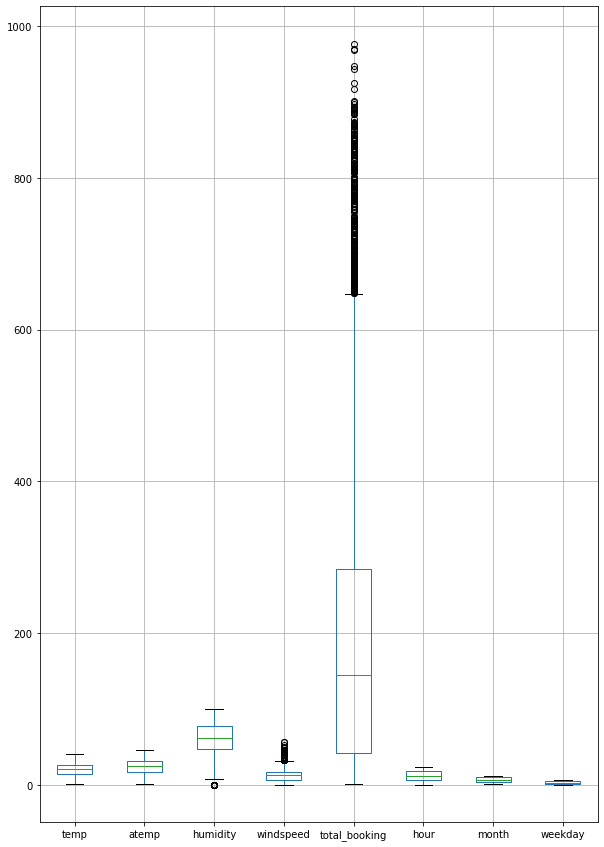

In [7]:
df_train.boxplot(figsize=(10,15))
plt.show()
#Column 'windspeed' seems to have outliers

In [8]:
Columntitle=['temp','atemp','humidity','windspeed']
for x in Columntitle:
    q75,q25 = np.percentile(df_train.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_train.loc[df_train[x] < min,x] = np.nan
    df_train.loc[df_train[x] > max,x] = np.nan

In [9]:
df_train.isnull().sum()

season             0
holiday            0
workingday         0
weather            0
temp               0
atemp              0
humidity          22
windspeed        227
total_booking      0
date               0
time               0
hour               0
month              0
weekday            0
dtype: int64

In [10]:
df_train = df_train.dropna(axis = 0)

In [11]:
df_train.isnull().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
date             0
time             0
hour             0
month            0
weekday          0
dtype: int64

Perform Correlation Analysis

<AxesSubplot:>

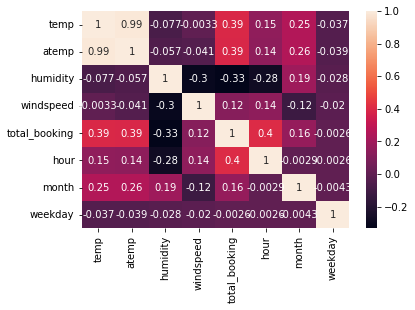

In [12]:
correlation = df_train.corr()
sns.heatmap(correlation, annot = True)
#Total Booking is moderately correlated with temp and atemp

In [13]:
df_train['total_booking'].describe()

count    10638.000000
mean       191.882685
std        181.238751
min          1.000000
25%         42.000000
50%        145.000000
75%        285.000000
max        977.000000
Name: total_booking, dtype: float64

Perform Data Visualization

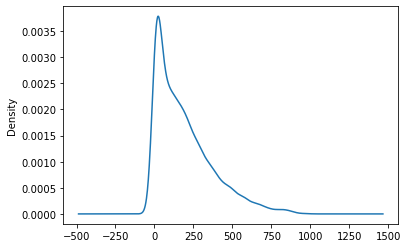

In [14]:
ax = df_train['total_booking'].plot.kde()

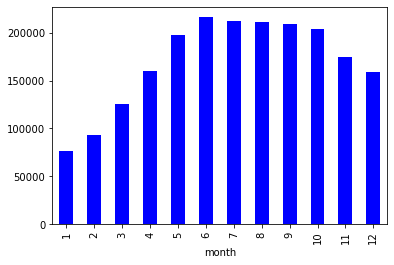

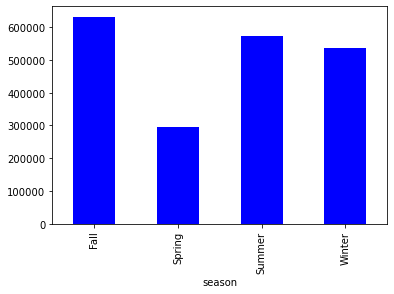

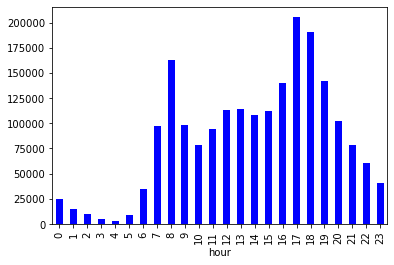

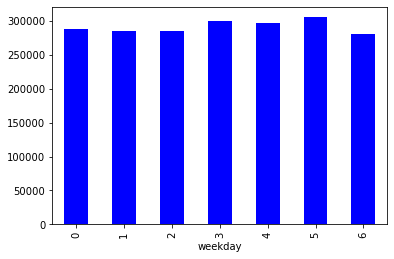

In [15]:
monthvsbooking = df_train.groupby(["month"])["total_booking"].sum()
monthvsbooking.plot.bar(color="blue")
plt.show()
seasonvsbooking = df_train.groupby(["season"])["total_booking"].sum()
seasonvsbooking.plot.bar(color="blue")
plt.show()
hourvsbooking = df_train.groupby(["hour"])["total_booking"].sum()
hourvsbooking.plot.bar(color="blue")
plt.show()
weekdayvsbooking = df_train.groupby(["weekday"])["total_booking"].sum()
weekdayvsbooking.plot.bar(color="blue")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


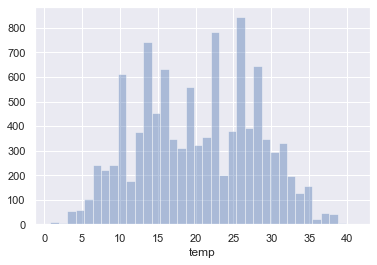

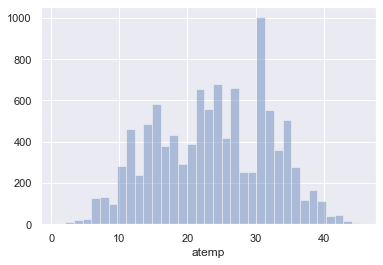

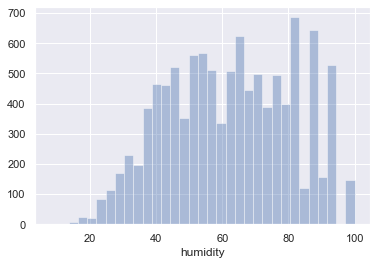

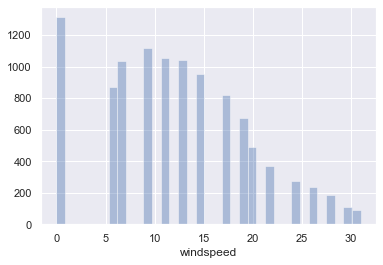

In [16]:
sns.set()
sns.distplot(df_train['temp'], kde = False)
plt.show() 
sns.distplot(df_train['atemp'], kde = False)
plt.show() 
sns.distplot(df_train['humidity'], kde = False)
plt.show() 
sns.distplot(df_train['windspeed'], kde = False)
plt.show() 


Convert the categorical variables into one hot vector

In [17]:
import pandas as pd
encode=pd.DataFrame(df_train['total_booking'])
dummies1 = pd.get_dummies(df_train.season)
encode=encode.join(dummies1)
dummies2 = pd.get_dummies(df_train.weather)
encode=encode.join(dummies2)
encode.head()

,total_booking,Fall,Spring,Summer,Winter,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy
0,504,0,0,1,0,1,0,0,0
1,5,1,0,0,0,1,0,0,0
2,139,0,1,0,0,1,0,0,0
3,209,0,0,0,1,1,0,0,0
4,184,1,0,0,0,1,0,0,0


Split your dataset for training and testing

In [18]:
from sklearn.model_selection import train_test_split
X=encode.drop(['total_booking'], axis=1)
y=encode.total_booking
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=5, test_size=0.2)

Fit various models

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [27]:
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=7)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
rf_rsme = mean_squared_error(y_test,y_pred_rf,squared=False)

In [28]:
ada=AdaBoostClassifier(n_estimators =100, learning_rate=0.6)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
ada_rsme = mean_squared_error(y_test,y_pred_ada,squared=False)

In [34]:
model_bag = BaggingClassifier()
model_bag.fit(X_train, y_train)
y_pred_bag = model_bag.predict(X_test)
bag_rsme = mean_squared_error(y_test,y_pred_bag,squared=False)

In [29]:
model_rbf=SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)
rbf_rsme = mean_squared_error(y_test,y_pred_rbf,squared=False)

In [30]:
knn = KNeighborsClassifier(n_neighbors=7)  
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_rsme = mean_squared_error(y_test,y_pred_knn,squared=False)

In [36]:
models = {'Model': ['Random Forest', 'adaboost', 'Bagging', 'SVC','knn'], 'RSME': [rf_rsme, ada_rsme, bag_rsme, rbf_rsme, knn_rsme]}
models_df = pd.DataFrame(models)

Display a Factor plot

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


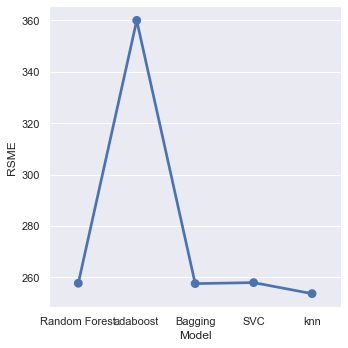

In [39]:
import matplotlib.pyplot as plt
sns.factorplot(x ='Model', y ='RSME', data = models_df)
plt.show()

Perform Hyper-parameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV
model_params = {'learning_rate':[0.65,0.70,0.75], 'n_estimators':[100,100]}
model_cv = GridSearchCV(ada,model_params,cv=5,n_jobs=-1,verbose=True,return_train_score = True,scoring = 'recall')
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=0.6, n_estimators=100),
             n_jobs=-1,
             param_grid={'learning_rate': [0.65, 0.7, 0.75],
                         'n_estimators': [100, 100]},
             return_train_score=True, scoring='recall', verbose=True)

In [43]:
model_cv.best_params_

{'learning_rate': 0.65, 'n_estimators': 100}

Perform prediction on the test set

In [45]:
y_pred_cv = model_cv.predict(X_test)
RSME = mean_squared_error(y_test,y_pred_cv,squared=False)
RSME

343.9867510071006